# Pratice - Anomaly Detection

# 1 - Packages and Utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2 - Anomaly Detection

## 2.1 - Problem statement

**Implement anomaly detection algorithm to detect anomalous behavier in server computers**

## 2.2 - Dataset

In [3]:
X_part1 = np.load('data/X_part1.npy')
X_val_part1 = np.load('data/X_val_part1.npy')
y_val_part1 = np.load('data/y_val_part1.npy')

In [4]:
X_part1[:5]

array([[13.04681517, 14.74115241],
       [13.40852019, 13.7632696 ],
       [14.19591481, 15.85318113],
       [14.91470077, 16.17425987],
       [13.57669961, 14.04284944]])

In [5]:
y_val_part1[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [6]:
print(f'number of anomalous behavier: {y_val_part1.sum()}')

number of anomalous behavier: 9


In [7]:
print(f'shape X_part1: {X_part1.shape}')
print(f'shape X_val_part1: {X_val_part1.shape}')
print(f'shape y_val_part1: {y_val_part1.shape}')

shape X_part1: (307, 2)
shape X_val_part1: (307, 2)
shape y_val_part1: (307,)


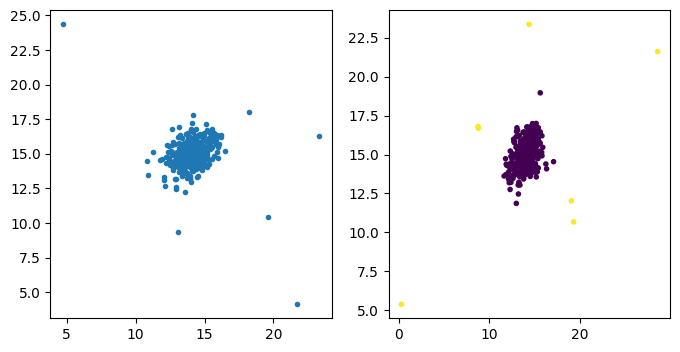

In [8]:
# visualize dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(X_part1[:, 0], X_part1[:, 1], marker='.')
ax2.scatter(X_val_part1[:, 0], X_val_part1[:, 1], marker='.', c=y_val_part1)
plt.show()

## 2.3 - Gaussian Distribution

In [9]:
def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)**2
    return mu, sigma

In [10]:
mu, sigma = estimate_gaussian(X_part1)
print(f'means: {mu}')
print(f'variances: {sigma}')

means: [14.11222578 14.99771051]
variances: [1.83263141 1.70974533]


In [44]:
def model(X, mu, sigma):
    n_feature = X.shape[1]
    prob_feature = (1/np.square(2 * np.pi * sigma)) * np.exp(-(X-mu)**2/(2 * sigma))
    prob = np.prod(prob_feature, axis=1)
    return prob

In [45]:
def multivariate_gaussian(X, mu, var):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

In [46]:
p = model(X_part1, mu, sigma)
print(f'p_value: {p[:5]}')

p_value: [4.70338419e-05 3.65640716e-05 5.26612336e-05 3.65724852e-05
 4.62900324e-05]


In [47]:
p_test = multivariate_gaussian(X_part1, mu, sigma)
p_test[:5]

array([0.06470829, 0.05030417, 0.07245035, 0.05031575, 0.06368497])

In [13]:
esilon_min, esilon_max = np.min(p), np.max(p)
esilon_space = np.linspace(esilon_min, esilon_max, 1000)
predict = (p <= esilon_space[100])
np.sum((predict == 1) & (y_val_part1 == 1))
np.sum(predict & y_val_part1)
np.sum((predict == 1) & (y_val_part1 == 0))
np.sum((predict == 0) & (y_val_part1 == 1))

1

In [21]:
# choose esilon
def find_esilon(prob, y_val_part1, num_of_esilon_space=1000):
    
    esilon_min, esilon_max = np.min(prob), np.max(prob)
    
    esilon_space = np.linspace(esilon_min, esilon_max, num_of_esilon_space)
    print(len(esilon_space))
    
    best_f1 = 0
    epsilon = 0
    
    for i in reversed(range(num_of_esilon_space)):
        
        predict = prob < esilon_space[i]
    
        tp = np.sum((predict == 1) & (y_val_part1 == 1))
        fp = np.sum((predict == 1) & (y_val_part1 == 0))
        fn = np.sum((predict == 0) & (y_val_part1 == 1))

        precision = tp/(tp + fp)
        recall = tp/(tp + fn)
        f1 = (2*precision*recall)/(precision + recall)
        if f1 > best_f1:
            esilon = esilon_space[i]
            best_f1 = f1
            
    return esilon, best_f1

In [48]:
esilon, best_f1 = find_esilon(p_test, y_val_part1)
print(f'Esilon: {esilon}')
print(f'best f1: {best_f1}')

1000
Esilon: 0.0026085761503407963
best f1: 0.8


C:\Users\DELL\AppData\Local\Temp\ipykernel_8816\3790908305.py:20: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp + fp)


## 2.4 - High dimentional dataset